In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from src.generate_ode import ode_gen_qcrispri, ode_gen_qcrispri_simple, ode_gen_qcrispri_sponge, ode_gen_quorum
from src.calculate_metrics import CalculateDynamicsMetrics
from src.solve_ode import solve_qcrispri, solve_qcrispri_simple, solve_qcrispri_sponge, solve_quorum, t, alpha0, kd1, kd2
from src.plots import vertical_stack_plot_3, plot_2param_vary
from src.sensitivity_analysis import vary_two_parameter,vary_single_parameter, vary_decoysite, get_default_param_value


Base Model equations

\begin{equation}
P0 ---\alpha0---> P0 + n_A*A + n_G*G \\
P1 ---\alpha_I---> P1 + n_A*A + n_G*G  \\
P_T ----\alpha_R---> P_T + R \\
2R + 2A <----^{k1R}--_{kd1}---> R*  \\
R* + P0 <-----^{k2R}---_{kd2}---> P1 \\
R, A, G ---d_R, d_A, d_G----> \emptyset
\end{equation}

# Model Simulations

### Simulate Quorum sensing system using the model fit parameters

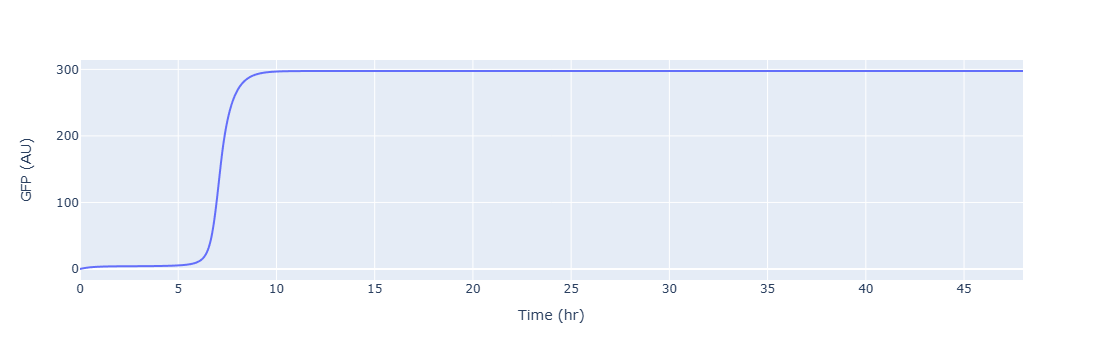

In [2]:
base_df = solve_quorum()
#Plot GFP vs Time for "BASE MODEL"
fig = px.line(x = t, y = base_df.GFP, labels={'x':'Time (hr)', 'y':'GFP (AU)'})
fig.show()

### Model fit the qCRISPRI system with experimental data

          inAcP           AcP             N       LuxR           AHL  \
0     25.000000  0.000000e+00  1.000000e+07   0.000000      0.000000   
1     25.000000  5.691002e-11  1.016982e+07   8.389899      0.000120   
2     25.000000  2.590488e-09  1.034253e+07  16.399667      0.000239   
3     25.000000  2.170537e-08  1.051817e+07  24.046526      0.000358   
4     25.000000  9.291762e-08  1.069679e+07  31.346920      0.000477   
...         ...           ...           ...        ...           ...   
2995   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060543   
2996   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060546   
2997   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060548   
2998   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060551   
2999   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060553   

            LuxR_A         GFPc          GFP       dCas9         pC         pD  
0     0.000000e+00  1442.001260  1442.001260    0.0000

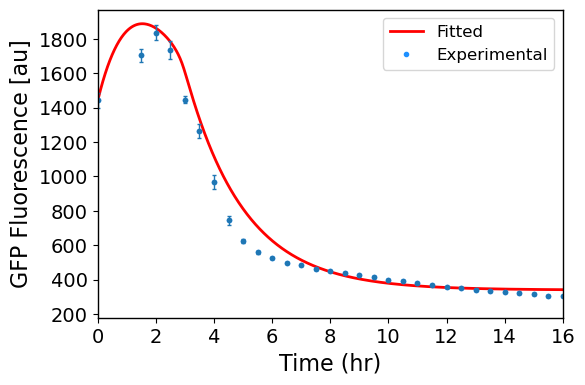

In [3]:
#import experimental data 
data = pd.read_excel('Book1.xlsx')
#simulate qcrispri dynamics
qcrispri_df = solve_qcrispri(activity_ratio= 0.1)
print(qcrispri_df)  # Print first few rows


#Plot GFP vs Time for "qCRISPRi MODEL"
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(t, qcrispri_df.GFP, linewidth = 2, color = 'red', label = 'Fitted')
plt.plot(data.time, data.data, '.', label = 'Experimental', color = 'dodgerblue')
plt.errorbar(data.time, data.data, yerr=data.SDV, fmt=".", elinewidth = 1, capsize=1.2)
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
ax.set_xlabel('Time (hr)', fontsize = 16)
ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
ax.legend(prop={"size":14}, loc = 'upper right')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.rc('legend', fontsize=12)
plt.legend()
plt.show()
fig.savefig('Figures1.png', dpi=256, bbox_inches = "tight")




### Plot of stringent experimetnal data with the qcrispri model for alpha0= 0.1 and using Hill equations 

<bound method NDFrame.head of               AHL        dCas9          GFP             N
0        0.000000     0.000000  1726.752756  1.000000e+07
1        0.000188     0.018948  1771.240422  1.017416e+07
2        0.000373     0.037884  1814.392529  1.035136e+07
3        0.000556     0.056808  1856.249121  1.053164e+07
4        0.000735     0.075721  1896.849013  1.071507e+07
...           ...          ...          ...           ...
2995  6318.982037  1195.220775   372.076904  2.153875e+11
2996  6319.154009  1195.464578   372.076904  2.153927e+11
2997  6319.325350  1195.708230   372.076904  2.153979e+11
2998  6319.496061  1195.951732   372.076904  2.154031e+11
2999  6319.666145  1196.195085   372.076904  2.154082e+11

[3000 rows x 4 columns]>


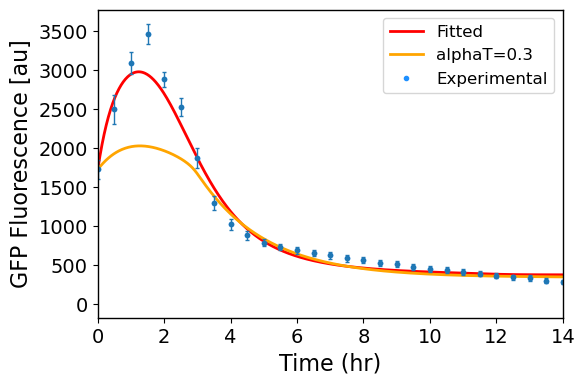

In [19]:
#import experimental data 
data2 = pd.read_excel('Book2.xlsx')
#Plot of stringent experimetnal data with the qcrispri model for alpha0= 0.1
qcrispri_str_df=solve_qcrispri_simple()
qcrispri_str_df_2=solve_qcrispri(alphaT=0.3, gfp0=1726.752756)
print(qcrispri_str_df.head)

#Plot strGFP vs Time for "qCRISPRi MODEL"
fig, ax = plt.subplots(figsize = (6,4))
plt.plot(t, qcrispri_str_df.GFP, linewidth = 2, color = 'red', label = 'Fitted')
plt.plot(t, qcrispri_str_df_2.GFP, linewidth = 2, color = 'orange', label = 'alphaT=0.3')
plt.plot(data2.time, data2.data, '.', label = 'Experimental', color = 'dodgerblue')
plt.errorbar(data2.time, data2.data, yerr=data2.SDV, fmt=".", elinewidth = 1, capsize=1.2)
ax.set_xlim(0,14)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
ax.set_xlabel('Time (hr)', fontsize = 16)
ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
ax.legend(prop={"size":14}, loc = 'upper right')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.rc('legend', fontsize=12)
plt.legend()
plt.show()
fig.savefig('Figures2.png', dpi=256, bbox_inches = "tight")

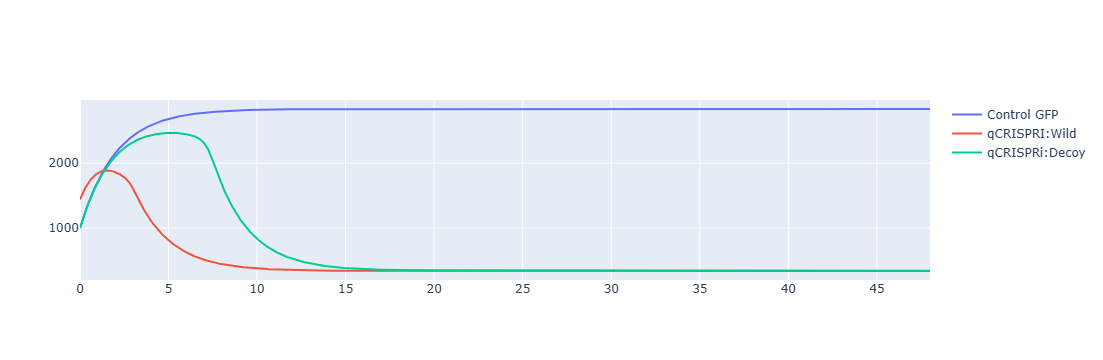

In [5]:
qcrispri_decoy = solve_qcrispri_sponge()
qcrispri_wild = solve_qcrispri()

#Plot GFP vs Time for "qCRISPRi decoy MODEL"
fig = go.Figure()
fig.add_trace(go.Scatter(x = t, y = qcrispri_decoy.GFPc, name = 'Control GFP'))
fig.add_trace(go.Scatter(x = t, y = qcrispri_wild.GFP, name = 'qCRISPRI:Wild'))
fig.add_trace(go.Scatter(x = t , y = qcrispri_decoy.GFP, name = 'qCRISPRi:Decoy'))
fig.show()

# Sensitivity Analysis: One Parameter at Once
Analze how changing leaky expression rate of dCas9 promoter(luxI), dissociation constant between DNA and LuxR:AHL compelx (kd2), and dissociation constant between AHL and LuxR(kd1) affects circuit parameters. All these 3 parameters were changed one at a time and the change in circuit parameters switching density, fold repression and transition time were calculated. 

In [31]:
#define ranges for the parameters
alphaT_range = [0, round(alpha0*0.5, 1), alpha0, round(alpha0*1.5, 1), round(alpha0*2, 1)]
Kd1_range = [kd1*0.25, kd1*0.5, kd1, kd1*1.5, kd1*1.75]
Kd2_range = [kd2*0.25, kd2*0.5, kd2, kd2*1.5, kd2*1.75]

## Basal expression / leakiness

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:33: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:38: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



2405.558291121247 339.8796338674763
2177.840554166701 339.8543575992207
1887.6929214851534 339.80404292838546
1809.9859073966966 339.7790037380295
1714.5375441846488 339.729159876809


C:\Users\devgu\Quorum_Switch\src\plots.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\Quorum_Switch\src\plots.py:24: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\Quorum_Switch\src\plots.py:28: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.



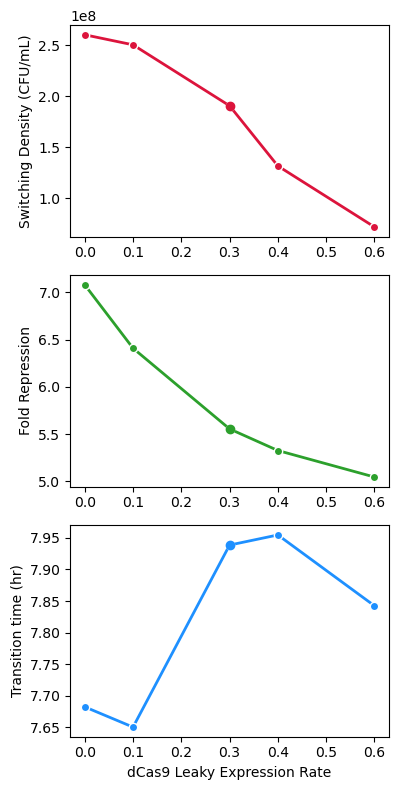

In [32]:
#simulating qcrispri dynamics with varying leaky expression rates and calculating metrics: switching density, fold repression, and transition time

gfp_leaky, metrics_leaky = vary_single_parameter("alphaT", alphaT_range )
fig = vertical_stack_plot_3('alphaT', alphaT_range, metrics_leaky.switching_density, metrics_leaky.fold_repression, metrics_leaky.transition_time, 'dCas9 Leaky Expression Rate')

### Concentration of dCas9 bound promoter in leaky vs non leaky system

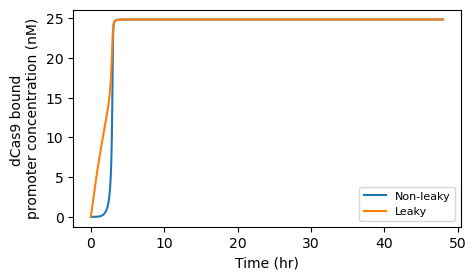

In [33]:
qcrispri_nonleaky = solve_qcrispri(alphaT = 0)
qcrispri_leaky = solve_qcrispri(activity_ratio=100)

fig, ax = plt.subplots(figsize=(5,2.82))
ax.plot(t, qcrispri_nonleaky.pD, label = "Non-leaky")
ax.plot(t, qcrispri_leaky.pD, label = 'Leaky' )
plt.ylabel('dCas9 bound \npromoter concentration (nM)')
plt.xlabel('Time (hr)')
plt.legend()
plt.rc('legend', fontsize=10)
plt.show()
fig.savefig('leaky_vs_non_leaky_dCas9_bound_promoter', dpi = 386, bbox_inches = 'tight')

### dynamics of qcrispri when leakiness of dCas9 expressing promoter is varied

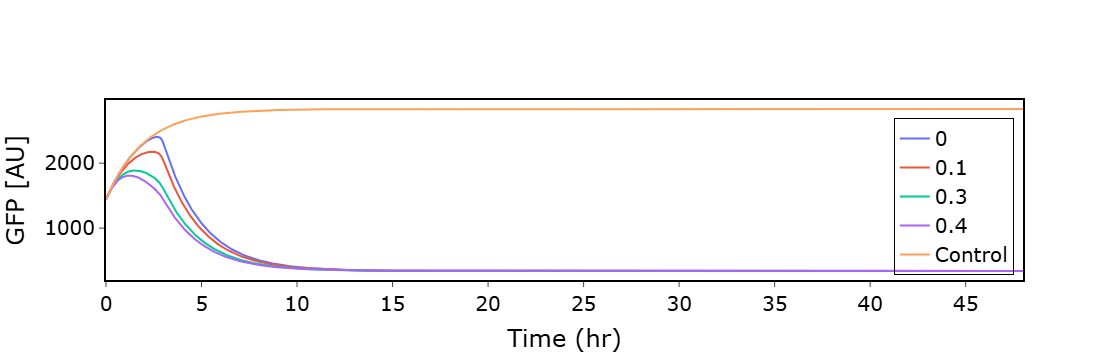

In [34]:
### dynamics of changing leakiness
x = t
fig = go.Figure()

for i in [0,0.1, alpha0, round(alpha0*1.5, 1)]:
    #x = gfp_leaky[gfp_leaky["alphaT_value"] == i].N
    y = gfp_leaky[gfp_leaky["alphaT_value"] == i].GFP
    fig.add_trace(go.Scatter(x = t, y = y, name = i))
yc = gfp_leaky[gfp_leaky["alphaT_value"] == 0].control
fig.add_trace(go.Scatter(x = t, y = yc, name = 'Control' ))

fig.update_layout( xaxis_title='Time (hr)', yaxis_title='GFP [AU]')
fig.update_layout(font=dict(size=20))
fig.update_layout(legend=dict(yanchor="top",y=0.90,xanchor="right",x=0.99,bgcolor="rgba(0,0,0,0)", bordercolor="Black",
        borderwidth=1))
fig.update_layout({'paper_bgcolor':'rgba(0,0,0,0)','plot_bgcolor':'rgba(0,0,0,0)'})
fig.update_xaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(font_family="Verdana", font_color="black")
fig.update_xaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.update_yaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.show()

## Dissociation constant of LuxR_AHL complex (Kd1)

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:33: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:38: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



1881.7537304097395 339.803951774893
1885.628168472645 339.80398953951897
1887.6929214851534 339.80404292838546
1888.4021868245784 339.8040838803477
1888.6031484567168 339.80410178645053


C:\Users\devgu\Quorum_Switch\src\plots.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\Quorum_Switch\src\plots.py:24: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\Quorum_Switch\src\plots.py:28: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.



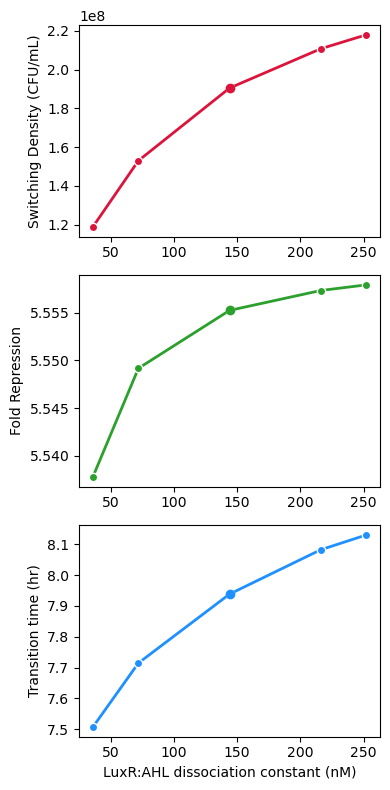

In [35]:
#simulating qcrispri dynamics with varying dissociation constant of LuxR_AHL complex and calculating 
#parameters switching density, fold repression, and transition time
Kd1_range = [kd1*0.25, kd1*0.5, kd1, kd1*1.5, kd1*1.75]
gfp_kd1, metrics_kd1 = vary_single_parameter("Kd1", Kd1_range )
fig = vertical_stack_plot_3('Kd1', Kd1_range, metrics_kd1.switching_density,metrics_kd1.fold_repression, metrics_kd1.transition_time, 'LuxR:AHL dissociation constant (nM)')


### concentration of LuxR:AHL complex

          inAcP           AcP             N       LuxR           AHL  \
0     25.000000  0.000000e+00  1.000000e+07   0.000000      0.000000   
1     25.000000  5.691002e-11  1.016982e+07   8.389899      0.000120   
2     25.000000  2.590488e-09  1.034253e+07  16.399667      0.000239   
3     25.000000  2.170537e-08  1.051817e+07  24.046526      0.000358   
4     25.000000  9.291762e-08  1.069679e+07  31.346920      0.000477   
...         ...           ...           ...        ...           ...   
2995   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060543   
2996   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060546   
2997   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060548   
2998   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060551   
2999   8.487013  1.651299e+01  5.736996e+11   0.006342  23649.060553   

            LuxR_A         GFPc          GFP       dCas9         pC         pD  
0     0.000000e+00  1442.001260  1442.001260    0.0000

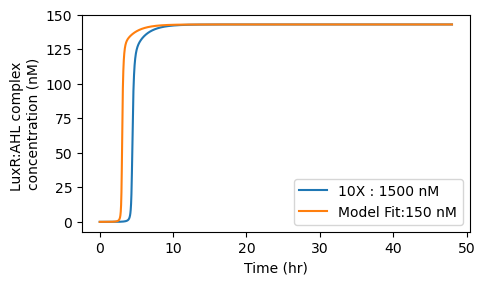

In [36]:
wild_kd1 = solve_qcrispri()
high_kd1 = solve_qcrispri(Kd1= kd1*10)
print(wild_kd1, high_kd1)

fig, ax = plt.subplots(figsize=(5,2.82))
ax.plot(t, high_kd1.LuxR_A, label = "10X : 1500 nM")
ax.plot(t, wild_kd1.LuxR_A, label = 'Model Fit:150 nM' )
plt.ylabel('LuxR:AHL complex \nconcentration (nM)')
plt.xlabel('Time (hr)')
plt.legend()
plt.rc('legend', fontsize=10)
plt.show()
fig.savefig('kd1vary_LuxR_A_dynamics', dpi = 386, bbox_inches = 'tight')

### Dynamics of qcrispri system when Kd1 was varied

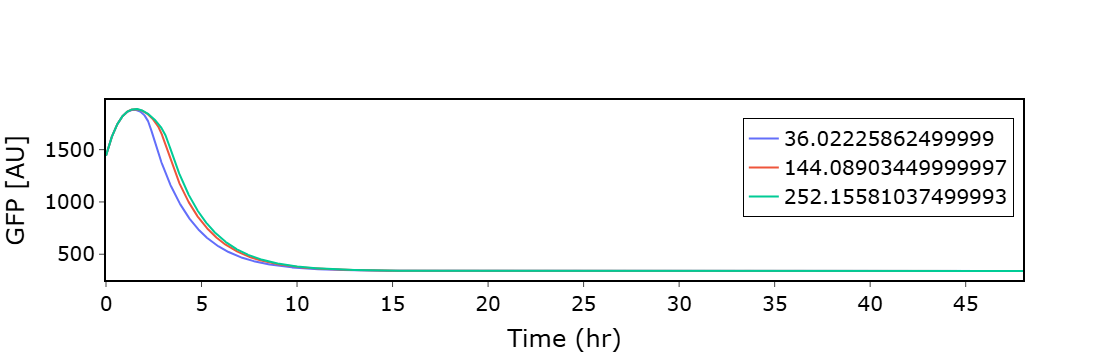

In [37]:
### dynamics of changing dissociation constant for luxR_AHL complex
x = t
fig = go.Figure()

for i in [kd1*0.25, kd1, kd1*1.75]:
    #x = gfp_kd1[gfp_kdna["kd1lex"] == i].N
    y = gfp_kd1[gfp_kd1["Kd1_value"] == i].GFP
    fig.add_trace(go.Scatter(x = t, y = y, name = '{}'.format(i)))
fig.update_layout( xaxis_title='Time (hr)', yaxis_title='GFP [AU]')
fig.update_layout(font=dict(size=20))
fig.update_layout(legend=dict(yanchor="top",y=0.90,xanchor="right",x=0.99,bgcolor="rgba(0,0,0,0)", bordercolor="Black",
        borderwidth=1))
fig.update_layout({'paper_bgcolor':'rgba(0,0,0,0)','plot_bgcolor':'rgba(0,0,0,0)'})
fig.update_xaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(font_family="Verdana", font_color="black")
fig.update_xaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.update_yaxes(ticks="outside",tickson="boundaries",ticklen=5)

fig.show()

## Dissociation constant for LuxR_AHL complex and DNA (Kd2)

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:33: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:38: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



1882.2585963360061 335.7934918079591
1885.7181383619309 337.1349404109
1887.6929214851534 339.80404292838546
1888.3916715875787 342.45490943118637
1888.5915950186304 343.77356238867674


C:\Users\devgu\Quorum_Switch\src\plots.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\Quorum_Switch\src\plots.py:24: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\Quorum_Switch\src\plots.py:28: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.



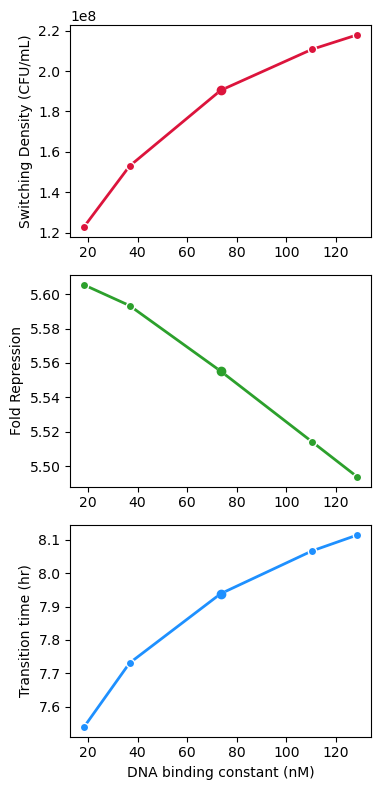

In [38]:
#simulating qcrispri dynamics with varying dissociation constant for LuxR_AHL complex and calculating 
#parameters switching density, fold repression, and transition time
Kd2_range = [kd2*0.25, kd2*0.5, kd2, kd2*1.5, kd2*1.75]
gfp_kd2, metrics_kd2 = vary_single_parameter("Kd2", Kd2_range )
fig = vertical_stack_plot_3('Kd2', Kd2_range, metrics_kd2.switching_density, metrics_kd2.fold_repression, metrics_kd2.transition_time, 'DNA binding constant (nM)')

### Max GFP of the system when Kd2 was set to model fit parameter vs 1.75*model fit parameter

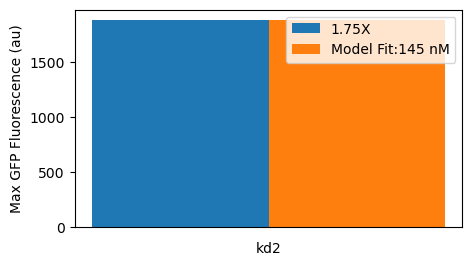

In [39]:
wild_kd2 = solve_qcrispri()
high_kd2 = solve_qcrispri(Kd2= kd2*1.75)

width=0.1
fig, ax = plt.subplots(figsize=(5,2.82))
ax.bar( 0, max(high_kd2.GFP), width, label = "1.75X")
ax.bar(0+ width, max(wild_kd2.GFP), width, label = 'Model Fit:145 nM' )
plt.ylabel('Max GFP Fluorescence (au)')
plt.xlabel('kd2')
ax.tick_params(bottom=False)
ax.set_xticklabels(labels = '')
plt.rc('legend', fontsize=10)
plt.legend()
plt.show()
fig.savefig('kd2vary_MaxGFP', dpi = 386, bbox_inches = 'tight')

### Dynamics of the qcrispri system when Kd2 is varied.

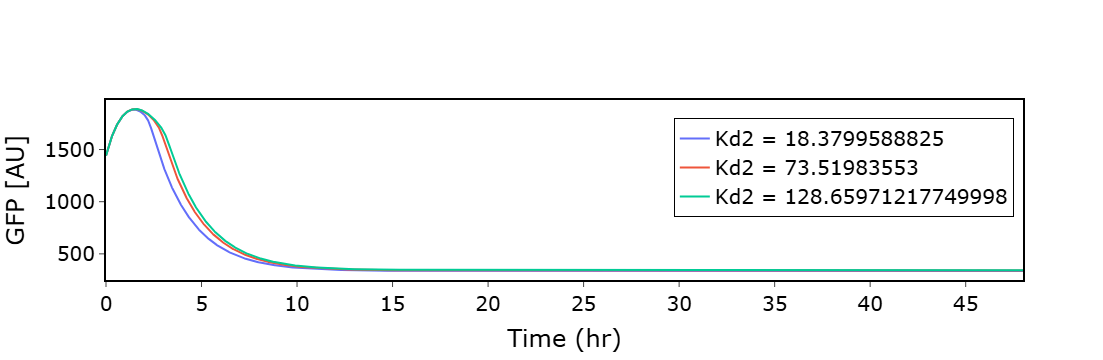

In [40]:
### dynamics of changing dissociation constant for luxR_AHL complex
x = t
fig = go.Figure()

for i in [kd2*0.25, kd2, kd2*1.75]:
    #x = gfp_kd2[gfp_kd2["kd2_bind"] == i].N
    y = gfp_kd2[gfp_kd2["Kd2_value"] == i].GFP
    fig.add_trace(go.Scatter(x = t, y = y, name = 'Kd2 = {}'.format(i)))
fig.update_layout( xaxis_title='Time (hr)', yaxis_title='GFP [AU]')
fig.update_layout(font=dict(size=20))
fig.update_layout(legend=dict(yanchor="top",y=0.90,xanchor="right",x=0.99,bgcolor="rgba(0,0,0,0)", bordercolor="Black",
        borderwidth=1))
fig.update_layout({'paper_bgcolor':'rgba(0,0,0,0)','plot_bgcolor':'rgba(0,0,0,0)'})
fig.update_xaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showgrid=False, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(font_family="Verdana", font_color="black")
fig.update_xaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.update_yaxes(ticks="outside",tickson="boundaries",ticklen=5)
fig.show()

## Compiled figure for sensitivity of the dynamics metrics to different parameters 

In [41]:
density = pd.concat([metrics_leaky.switching_density,metrics_kd1.switching_density, metrics_kd2.switching_density]) 
fold = pd.concat([metrics_leaky.fold_repression,metrics_kd1.fold_repression, metrics_kd2.fold_repression]) 
time = pd.concat([metrics_leaky.transition_time,metrics_kd1.transition_time, metrics_kd2.transition_time])
min_density = min(density)
max_density = max(density)
min_fold = min(fold)
max_fold = max(fold)
min_time = min(time)
max_time = max(time)

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\3902051049.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\3902051049.py:7: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\3902051049.py:12: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\3902051049.py:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-"

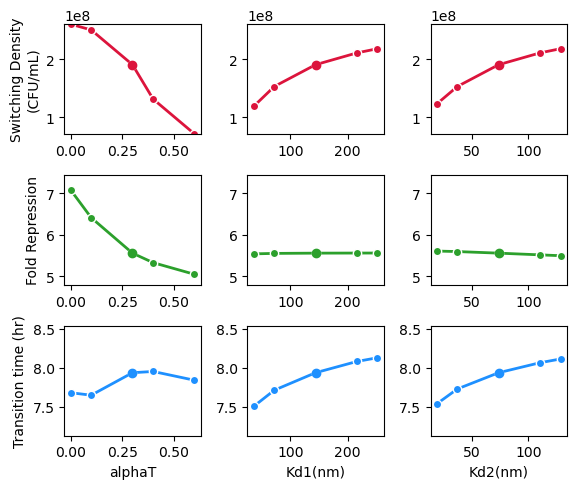

In [42]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9) ) = plt.subplots(3,3, figsize =(6,5))
ax1.plot(metrics_leaky.alphaT_value, metrics_leaky.switching_density, "C1o-", mec = '1.0', color = 'crimson', linewidth = 2)
ax1.plot(alpha0, metrics_leaky.switching_density.iloc[2], marker = "o", color = 'crimson')
ax1.set_ylim(min_density, 1*max_density)
ax1.set_ylabel('Switching Density\n(CFU/mL)', fontsize = 10)

ax2.plot(metrics_kd1.Kd1_value, metrics_kd1.switching_density, "C1o-", mec = '1.0', color = 'crimson', linewidth = 2)
ax2.plot(kd1, metrics_kd1.switching_density.iloc[2], marker = "o", color = 'crimson')
ax2.set_ylim(min_density, 1*max_density)
#ax2.set_ylabel('Switching Density (CFU/mL)')

ax3.plot(metrics_kd2.Kd2_value, metrics_kd2.switching_density, "C1o-", mec = '1.0', color = 'crimson', linewidth = 2)
ax3.plot(kd2, metrics_kd2.switching_density.iloc[2], marker = "o", color = 'crimson')
ax3.set_ylim(min_density, 1*max_density)
#ax3.set_ylabel('Switching Density (CFU/mL)')


ax4.plot(metrics_leaky.alphaT_value, metrics_leaky.fold_repression, "C1o-", mec = '1.0', color = 'C2', linewidth = 2)
ax4.plot(alpha0, metrics_leaky.fold_repression.iloc[2], marker = "o", color = 'C2')
ax4.set_ylim(0.95*min_fold, 1.05*max_fold)
ax4.set_ylabel('Fold Repression', fontsize = 10)

ax5.plot(metrics_kd1.Kd1_value, metrics_kd1.fold_repression, "C1o-", mec = '1.0', color = 'C2', linewidth = 2)
ax5.plot(kd1, metrics_kd1.fold_repression.iloc[2], marker = "o", color = 'C2')
ax5.set_ylim(0.95*min_fold, 1.05*max_fold)
#ax5.set_ylabel('Fold Repression')

ax6.plot(metrics_kd2.Kd2_value, metrics_kd2.fold_repression, "C1o-", mec = '1.0', color = 'C2', linewidth = 2)
ax6.plot(kd2, metrics_kd2.fold_repression.iloc[2], marker = "o", color = 'C2')
ax6.set_ylim(0.95*min_fold, 1.05*max_fold)
#ax6.set_ylabel('Fold Repression')

ax7. plot(metrics_leaky.alphaT_value, metrics_leaky.transition_time, "C1o-", mec = '1.0', color = 'dodgerblue', linewidth = 2)
ax7.plot(alpha0, metrics_leaky.transition_time.iloc[2], marker = "o", color = 'dodgerblue')
ax7.set_xlabel('alphaT', fontsize = 10)
ax7.set_ylim(0.95*min_time, 1.05*max_time)
ax7.set_ylabel('Transition time (hr)', fontsize = 10)

ax8. plot(metrics_kd1.Kd1_value, metrics_kd1.transition_time, "C1o-", mec = '1.0', color = 'dodgerblue', linewidth = 2)
ax8.plot(kd1, metrics_kd1.transition_time.iloc[2], marker = "o", color = 'dodgerblue')
ax8.set_xlabel('Kd1(nm)', fontsize = 10)
ax8.set_ylim(0.95*min_time, 1.05*max_time)
#ax8.set_ylabel('Transition time (hr)')

ax9. plot(metrics_kd2.Kd2_value, metrics_kd2.transition_time, "C1o-", mec = '1.0', color = 'dodgerblue', linewidth = 2)
ax9.plot(kd2, metrics_kd2.transition_time.iloc[2], marker = "o", color = 'dodgerblue')
ax9.set_xlabel('Kd2(nm)', fontsize = 10)
ax9.set_ylim(0.95*min_time, 1.05*max_time)
#ax9.set_ylabel('Transition time (hr)')

fig.tight_layout()
fig.show()
fig.savefig('singleSensi_param.png', dpi=300)

## compiled figure showing variation in dynamics of the system when each parameter is increased/decreased

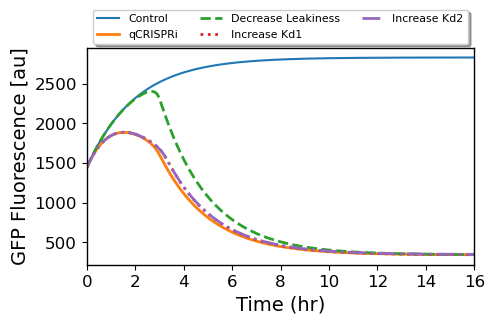

In [43]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize = (5,2.82))
plt.plot(t, gfp_leaky[gfp_leaky["alphaT_value"] == 0].control, linewidth = 1.5, label='Control', color = colors[0]) 
plt.plot(t, gfp_leaky[gfp_leaky["alphaT_value"] == alpha0].GFP, linewidth = 2, label='qCRISPRi', color = colors[1])
plt.plot(t, gfp_leaky[gfp_leaky["alphaT_value"] == 0].GFP, linewidth = 2, linestyle = '--', label='Decrease Leakiness', color = colors[2])  
plt.plot(t, gfp_kd1[gfp_kd1["Kd1_value"] == 1.75*kd1].GFP, linewidth = 2, linestyle = ':', label='Increase Kd1', color = colors[3])
plt.plot(t, gfp_kd2[gfp_kd2["Kd2_value"] == 1.75*kd2].GFP, linewidth = 2, linestyle = '-.', label='Increase Kd2', color = colors[4])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1)
ax.set_xlabel('Time (hr)', fontsize = 14)
ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 14)
ax.legend(prop={"size":12}, loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=9)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True,prop={'size': 7.9})
fig.savefig('singleSensi_dynamics.png', dpi=356, bbox_inches = "tight")

# Sensitiviy Analysis: 2 Parameters at once

### Varying leakiness + dCas9 repression strength

2405.558291121247 339.8796338674763
2412.4895542977247 617.0016910482805
2420.0747293958298 894.1237482255787


C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:70: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:78: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



2428.4304335797797 1171.2458054069882
2177.840554166701 339.8543575992207
2205.1373597798834 616.9792232546664
2234.182797671872 894.1040889101117
2265.182888325832 1171.2289545655574
1887.6929214851534 339.80404292838546
1923.4045449201699 616.9344991026724
1965.3079588680525 894.0649552769592
2014.988272253289 1171.1954114512464
1809.9859073966966 339.7790037380295
1842.9664793097622 616.9122420450772
1882.6553509671753 894.0454803521251
1931.40628558984 1171.1787186591735
1714.5375441846488 339.729159876809
1742.0305768800065 616.8679363906049


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1776.0161131482346 894.0067129044005
1819.4004792428964 1171.1454894181966


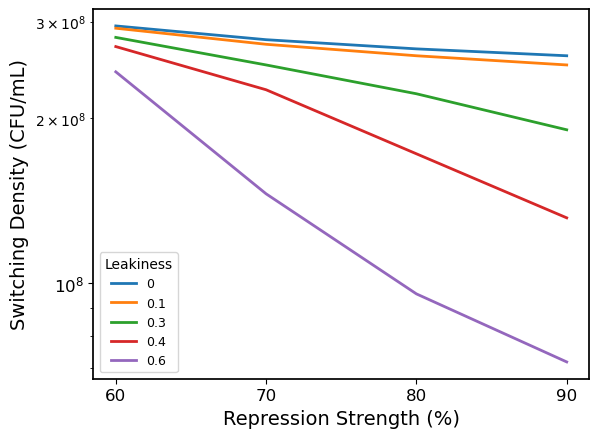

In [100]:
gfp_dcas9_df, metrics_dcas9_df = vary_two_parameter('alphaT', alphaT_range, 'activity_ratio', [0.1, 0.2, 0.3, 0.4])

plot_2param_vary(metrics_dcas9_df, 'activity_ratio', 'switching_density', 'Repression Strength (%)', 'Switching Density (CFU/mL)')
#plt.xlim(0.1,0.7)
#plt.ylim(10**8, 6*10**8)
plt.yscale('log');
plt.gca().invert_xaxis()
plt.xticks([0.4, 0.3, 0.2, 0.1],[60, 70, 80, 90])
#for illustrator figure
ax.set_xlabel('dCas9 Repression Strength (%)', fontsize=14)
ax.set_ylabel('Switching Density (CFU/mL)', fontsize=14)
ax.legend(prop={"size":12}, loc = 'upper right')
plt.rc('legend', fontsize=9)
#plt.gcf().set_size_inches(5, 2.82)
plt.savefig('leaky_couples_sd_repr.png', dpi = 256, bbox_inches = 'tight')

([<matplotlib.axis.XTick at 0x1b86ddaf150>,
 [Text(0.6, 0, '40'),
  Text(0.5, 0, '50'),
  Text(0.4, 0, '60'),
  Text(0.3, 0, '70'),
  Text(0.2, 0, '80'),
  Text(0.1, 0, '90')])

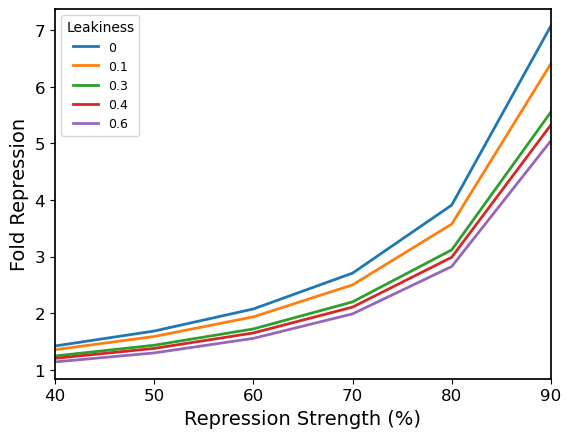

In [59]:
plot_2param_vary(metrics_dcas9_df, 'activity_ratio', 'fold_repression', 'Repression Strength (%)', 'Fold Repression')
plt.xlim(0.1,0.6)
plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1],[40, 50, 60, 70, 80, 90])

([<matplotlib.axis.XTick at 0x1b86df0fc90>,
 [Text(0.6, 0, '40'),
  Text(0.5, 0, '50'),
  Text(0.4, 0, '60'),
  Text(0.3, 0, '70'),
  Text(0.2, 0, '80'),
  Text(0.1, 0, '90'),
  Text(0.0, 0, '100')])

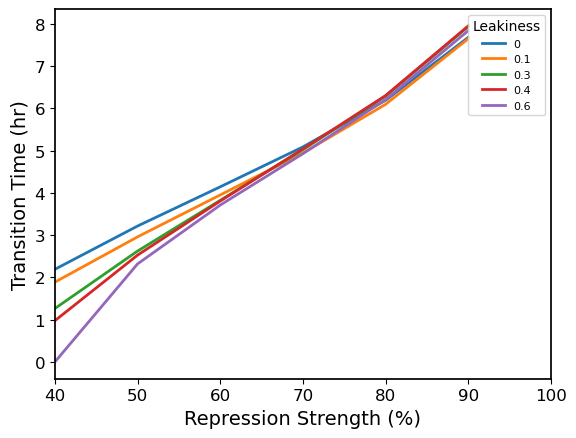

In [60]:
plot_2param_vary(metrics_dcas9_df, 'activity_ratio', 'transition_time', 'Repression Strength (%)', 'Transition Time (hr)')
plt.xlim(0.1,0.6)
#plt.ylim(1, 3)
plt.gca().invert_xaxis()
plt.xticks([0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0],[40, 50, 60, 70, 80, 90, 100])

### Varying  Leakiness + dissociation constant for LuxR:AHL complex

In [61]:
gfp_complex_df, metrics_complex_df = vary_two_parameter('alphaT', alphaT_range, 'Kd1', Kd1_range)

2278.9942746409897 339.87954089068984
2345.39990092847 339.8795794181484
2405.558291121247 339.8796338674763


C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:70: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:78: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



2437.7413942366634 339.8796755353892
2449.39537692692 339.8796938469709
2118.7436910546085 339.85426524608005
2151.8553067762887 339.85430351261726
2177.840554166701 339.8543575992207
2189.959148532758 339.8543991060287
2194.0271999706615 339.8544172214605
1881.7537304097395 339.803951774893
1885.628168472645 339.80398953951897
1887.6929214851534 339.80404292838546
1888.4021868245784 339.8040838803477
1888.6031484567168 339.80410178645053
1807.9252644489616 339.77891316548596
1809.2877277730163 339.77895068754054
1809.9859073966966 339.7790037380295
1810.2159914826111 339.7790444475138
1810.2814905395019 339.779062219082
1714.160828190713 339.7290704504239
1714.41260301159 339.72910747231845
1714.5375441846488 339.729159876809
1714.5790522495327 339.72920008945783
1714.5908989733384 339.72921762515887


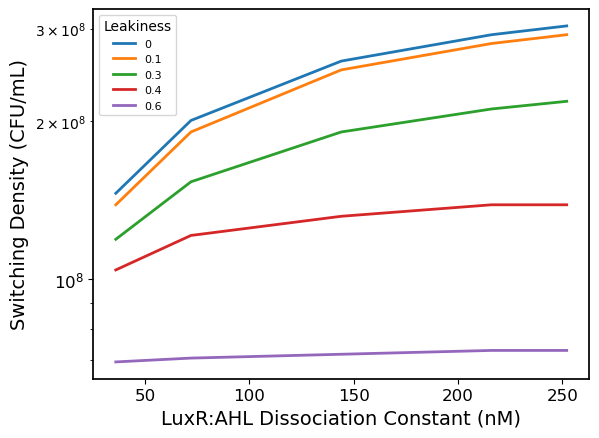

In [62]:
plot_2param_vary(metrics_complex_df, 'Kd1', 'switching_density', 'LuxR:AHL Dissociation Constant (nM)', 'Switching Density (CFU/mL)')
plt.yscale('log');

<module 'matplotlib.pyplot' from 'C:\\Users\\devgu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

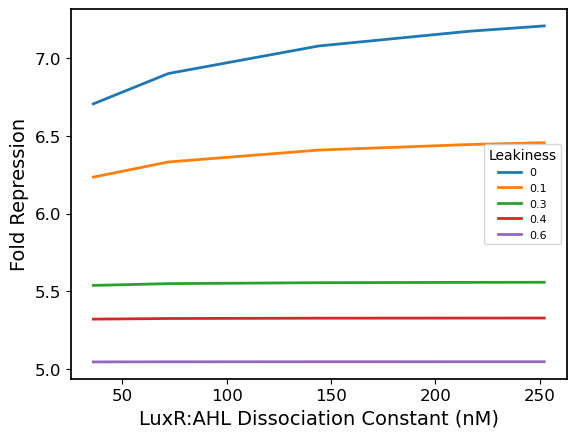

In [63]:
plot_2param_vary(metrics_complex_df, 'Kd1', 'fold_repression', 'LuxR:AHL Dissociation Constant (nM)', 'Fold Repression')

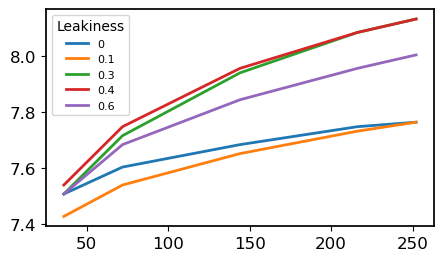

In [64]:
plot_2param_vary(metrics_complex_df, 'Kd1', 'transition_time', 'LuxR:AHL Dissociation Constant (nM)', 'Transition Time (hr)')
plt.xlabel('')
plt.ylabel('')
plt.gcf().set_size_inches(5, 2.82)
#plt.savefig('Figures\leaky_couples_tt_kcomp.png', dpi = 256, bbox_inches = 'tight')

### Varying Leakiness + dissociation constant of LuxR:AHL complex to DNA 

In [65]:
gfp_dna_df, metrics_dna_df = vary_two_parameter('alphaT', alphaT_range, 'Kd2', Kd2_range)

2285.2132884501793 335.8076739424903
2347.09730495604 337.16646269465633
2405.558291121247 339.8796338674763


C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:70: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:78: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



2437.3734678311707 342.5869457335853
2448.959788794251 343.9384101625121
2121.9482027861013 335.80294282099464
2152.6510635803797 337.15593868280234
2177.840554166701 339.8543575992207
2189.816056342561 342.54272630514333
2193.8576944521956 343.88315924030735
1882.2585963360061 335.7934918079591
1885.7181383619309 337.1349404109
1887.6929214851534 339.80404292838546
1888.3916715875787 342.45490943118637
1888.5915950186304 343.77356238867674
1808.1364022580894 335.78877189047165
1809.3250618597297 337.1244660450837
1809.9859073966966 339.7790037380295
1810.2118368894742 342.41130901978823
1810.2769116795882 343.71921153066506
1714.212019882578 335.7793431969911
1714.421567588634 337.1035666474727
1714.5375441846488 339.729159876809
1714.578022215709 342.32471712991384
1714.589761096786 343.61139281841105


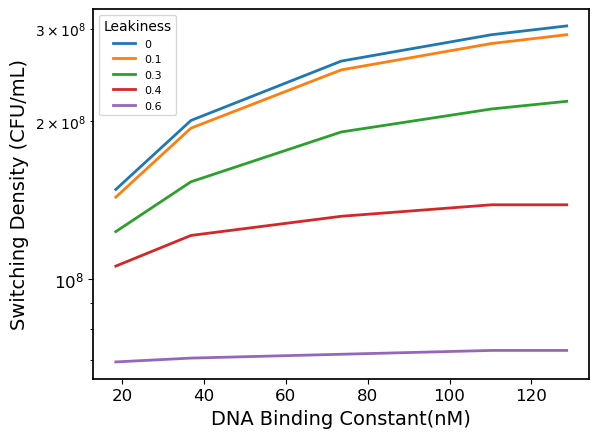

In [66]:
plot_2param_vary(metrics_dna_df, 'Kd2', 'switching_density', 'DNA Binding Constant(nM)', 'Switching Density (CFU/mL)')
plt.yscale('log');

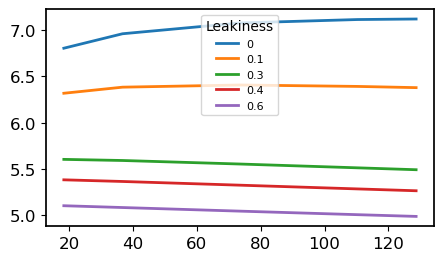

In [67]:
plot_2param_vary(metrics_dna_df, 'Kd2', 'fold_repression', 'DNA Binding Constant(nM)', 'Fold Repression')
plt.xlabel('')
plt.ylabel('')
plt.gcf().set_size_inches(5, 2.82)
#plt.savefig('Figures\leaky_couples_fr_Kd2.png', dpi = 256, bbox_inches = 'tight')

<module 'matplotlib.pyplot' from 'C:\\Users\\devgu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

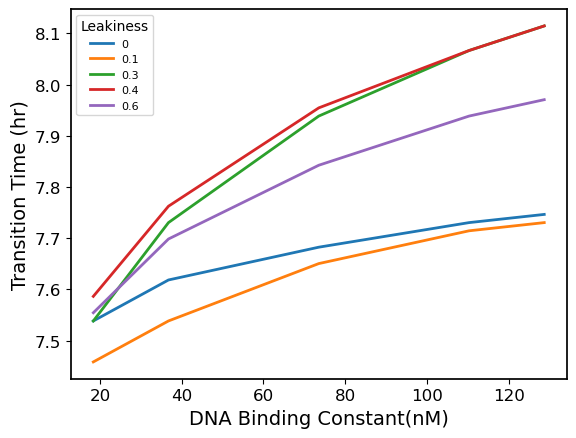

In [68]:
plot_2param_vary(metrics_dna_df, 'Kd2', 'transition_time', 'DNA Binding Constant(nM)', 'Transition Time (hr)')

## compiled dynamics image for leakiness + dCas9 repression strength

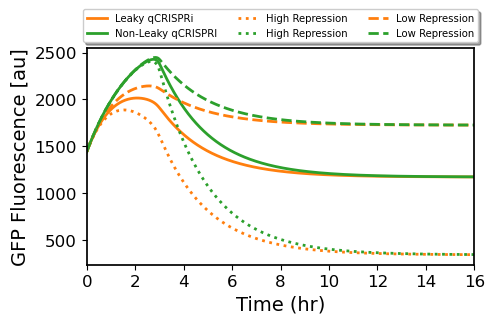

In [69]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5,2.82))
plt.plot(t, gfp_dcas9_df[(gfp_dcas9_df["alphaT"] == alpha0) & (gfp_dcas9_df['activity_ratio'] == 0.4)].GFP, linewidth = 2, label='Leaky qCRISPRi', color = colors[1])
plt.plot(t, gfp_dcas9_df[(gfp_dcas9_df["alphaT"] == 0) & (gfp_dcas9_df['activity_ratio'] == 0.4)].GFP, linewidth = 2, label='Non-Leaky qCRISPRI', color = colors[2])
plt.plot(t, gfp_dcas9_df[(gfp_dcas9_df["alphaT"] == alpha0) & (gfp_dcas9_df['activity_ratio'] == 0.1)].GFP, linewidth = 2, label='High Repression', linestyle = ':', color = colors[1])
plt.plot(t, gfp_dcas9_df[(gfp_dcas9_df["alphaT"] == 0) & (gfp_dcas9_df['activity_ratio'] == 0.1)].GFP, linewidth = 2, label='High Repression', linestyle = ':',  color = colors[2])
plt.plot(t, gfp_dcas9_df[(gfp_dcas9_df["alphaT"] == alpha0) & (gfp_dcas9_df['activity_ratio'] == 0.6)].GFP, linewidth = 2, label='Low Repression', linestyle = '--',  color = colors[1]) 
plt.plot(t, gfp_dcas9_df[(gfp_dcas9_df["alphaT"] == 0) & (gfp_dcas9_df['activity_ratio'] == 0.6)].GFP, linewidth = 2, label='Low Repression', linestyle = '--', color = colors[2])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
ax.set_xlabel('Time (hr)', fontsize = 14)
ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True,prop={'size': 7.25})

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=9)
plt.savefig('leaky_reprstrength_dynamics.png', dpi = 386, bbox_inches = "tight")

## compiled dynamics image for leakiness + Kcomplex LuxR:AHL

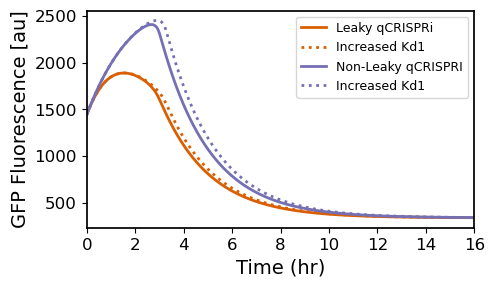

In [70]:
cmap = plt.get_cmap("Dark2")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5, 2.82))
plt.plot(t, gfp_complex_df[(gfp_complex_df["alphaT"] == alpha0) & (gfp_complex_df['Kd1'] == kd1)].GFP, linewidth = 2, label='Leaky qCRISPRi', color = colors[1]) 
plt.plot(t, gfp_complex_df[(gfp_complex_df["alphaT"] == alpha0) & (gfp_complex_df['Kd1'] == kd1*1.75)].GFP, linewidth = 2, label='Increased Kd1', linestyle = ':', color = colors[1]) 
plt.plot(t, gfp_complex_df[(gfp_complex_df["alphaT"] == 0) & (gfp_complex_df['Kd1'] == kd1)].GFP, linewidth = 2, label='Non-Leaky qCRISPRI', color = colors[2])
plt.plot(t, gfp_complex_df[(gfp_complex_df["alphaT"] == 0) & (gfp_complex_df['Kd1'] == kd1*1.75)].GFP, linewidth = 2, label='Increased Kd1', linestyle = ':',  color = colors[2])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
ax.set_xlabel('Time (hr)', fontsize = 14)
ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 14)
ax.legend(loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=9)
plt.savefig('leaky_kd1_dynamics.png', dpi = 386, bbox_inches = "tight")

## compiled dynamics image for leakiness + Kdna_bind of LuxR:AHL complex

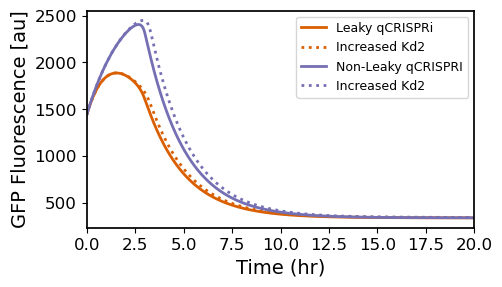

In [71]:
cmap = plt.get_cmap("Dark2")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5,2.82))
plt.plot(t, gfp_dna_df[(gfp_dna_df["alphaT"] == alpha0) & (gfp_dna_df['Kd2'] == kd2)].GFP, linewidth = 2, label='Leaky qCRISPRi', color = colors[1]) 
plt.plot(t, gfp_dna_df[(gfp_dna_df["alphaT"] == alpha0) & (gfp_dna_df['Kd2'] == kd2*1.75)].GFP, linewidth = 2, label='Increased Kd2', linestyle = ':', color = colors[1]) 
plt.plot(t, gfp_dna_df[(gfp_dna_df["alphaT"] == 0) & (gfp_dna_df['Kd2'] == kd2)].GFP, linewidth = 2, label='Non-Leaky qCRISPRI', color = colors[2])
plt.plot(t, gfp_dna_df[(gfp_dna_df["alphaT"] == 0) & (gfp_dna_df['Kd2'] == kd2*1.75)].GFP, linewidth = 2, label='Increased Kd2', linestyle = ':',  color = colors[2])
ax.set_xlim(0,20)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
ax.set_xlabel('Time (hr)', fontsize = 14)
ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 14)
ax.legend(loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=9)
plt.savefig('leaky_kdna_dynamics.png', dpi = 386, bbox_inches = "tight")

## compiled image for dynamics parameters

In [72]:
leaky_dcas9_rows =  (metrics_dcas9_df.alphaT == alpha0) | (metrics_dcas9_df.alphaT == 0) 
leaky_kd1_rows =  (metrics_complex_df.alphaT == alpha0) | (metrics_complex_df.alphaT == 0) 
leaky_kd2_rows =  (metrics_dna_df.alphaT == alpha0) | (metrics_dna_df.alphaT == 0) 
activity_ratio_rows = (metrics_dcas9_df.activity_ratio == 0.6) | (metrics_dcas9_df.activity_ratio == 0.4) | (metrics_dcas9_df.activity_ratio == 0.1)
kd1_rows = (metrics_complex_df.Kd1 == kd1*0.25) | (metrics_complex_df.Kd1 == kd1) | (metrics_complex_df.Kd1 == kd1*1.75)
kd2_rows = (metrics_dna_df.Kd2 == kd2*0.25) | (metrics_dna_df.Kd2 == kd2) | (metrics_dna_df.Kd2 == kd2*1.75)

leaky_activity_rows = leaky_dcas9_rows & activity_ratio_rows
leaky_kd1_rows = leaky_kd1_rows & kd1_rows
leaky_kd2_rows = leaky_kd2_rows & kd2_rows

metrics_repr_strnth = metrics_dcas9_df[leaky_activity_rows]
metrics_leaky_kd1 = metrics_complex_df[leaky_kd1_rows]
metrics_leaky_kd2 = metrics_dna_df[leaky_kd2_rows]


C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\253365612.py:70: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\253365612.py:71: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\253365612.py:72: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\253365612.py:73: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\253365612.py:74: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\devgu\

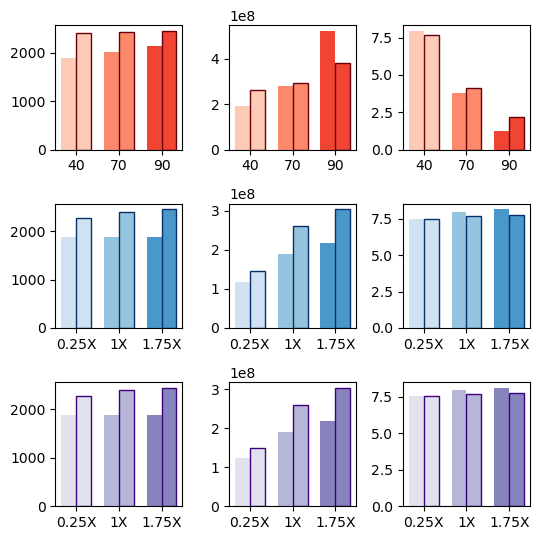

In [73]:
cmap1 = plt.get_cmap('Reds')
colors1 = cmap1([0.2, 0.4, 0.6, 1])
cmap2 = plt.get_cmap('Blues')
colors2 = cmap2([0.2, 0.4, 0.6, 1])
cmap3 = plt.get_cmap('Purples')
colors3 = cmap3([0.2, 0.4, 0.6, 1])


x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars

#to create clusters of leaky and non-leaky data had to divided based on second parameter. 
bar1 = metrics_repr_strnth[metrics_repr_strnth['alphaT'] == alpha0].max_gfp
bar2 = metrics_repr_strnth[metrics_repr_strnth['alphaT'] == 0].max_gfp
bar3 = metrics_repr_strnth[metrics_repr_strnth['alphaT'] == alpha0].switching_density
bar4 = metrics_repr_strnth[metrics_repr_strnth['alphaT'] == 0].switching_density
bar5 = metrics_repr_strnth[metrics_repr_strnth['alphaT'] == alpha0].transition_time
bar6 = metrics_repr_strnth[metrics_repr_strnth['alphaT'] == 0].transition_time
bar7 = metrics_leaky_kd1[metrics_leaky_kd1['alphaT'] == alpha0].max_gfp
bar8 = metrics_leaky_kd1[metrics_leaky_kd1['alphaT'] == 0].max_gfp
bar9 = metrics_leaky_kd1[metrics_leaky_kd1['alphaT'] == alpha0].switching_density
bar10 = metrics_leaky_kd1[metrics_leaky_kd1['alphaT'] == 0].switching_density
bar11 = metrics_leaky_kd1[metrics_leaky_kd1['alphaT'] == alpha0].transition_time
bar12 = metrics_leaky_kd1[metrics_leaky_kd1['alphaT'] == 0].transition_time
bar13 = metrics_leaky_kd2[metrics_leaky_kd2['alphaT'] == alpha0].max_gfp
bar14 = metrics_leaky_kd2[metrics_leaky_kd2['alphaT'] == 0].max_gfp
bar15 = metrics_leaky_kd2[metrics_leaky_kd2['alphaT'] == alpha0].switching_density
bar16 = metrics_leaky_kd2[metrics_leaky_kd2['alphaT'] == 0].switching_density
bar17 = metrics_leaky_kd2[metrics_leaky_kd2['alphaT'] == alpha0].transition_time
bar18 = metrics_leaky_kd2[metrics_leaky_kd2['alphaT'] == 0].transition_time


fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (5.5,5.5))
ax1.bar(x - width/2, bar1, width, color = [colors1[0], colors1[1], colors1[2]])
ax1.bar(x + width/2, bar2, width, color = [colors1[0], colors1[1], colors1[2]], edgecolor = colors1[3])
ax2.bar(x - width/2, bar3, width, color = [colors1[0], colors1[1], colors1[2]])
ax2.bar(x + width/2, bar4, width, color = [colors1[0], colors1[1], colors1[2]], edgecolor = colors1[3])
ax3.bar(x - width/2, bar5, width, color = [colors1[0], colors1[1], colors1[2]])
ax3.bar(x + width/2, bar6, width, color = [colors1[0], colors1[1], colors1[2]], edgecolor = colors1[3])
ax4.bar(x - width/2, bar7, width, color = [colors2[0], colors2[1], colors2[2]])
ax4.bar(x + width/2, bar8, width, color = [colors2[0], colors2[1], colors2[2]], edgecolor = colors2[3])
ax5.bar(x - width/2, bar9, width, color = [colors2[0], colors2[1], colors2[2]])
ax5.bar(x + width/2, bar10, width, color = [colors2[0], colors2[1], colors2[2]], edgecolor = colors2[3])
ax6.bar(x - width/2, bar11, width, color = [colors2[0], colors2[1], colors2[2]])
ax6.bar(x + width/2, bar12, width, color = [colors2[0], colors2[1], colors2[2]], edgecolor = colors2[3])
ax7.bar(x - width/2, bar13, width, color = [colors3[0], colors3[1], colors3[2]])
ax7.bar(x + width/2, bar14, width, color = [colors3[0], colors3[1], colors3[2]], edgecolor = colors3[3])
ax8.bar(x - width/2, bar15, width, color = [colors3[0], colors3[1], colors3[2]])
ax8.bar(x + width/2, bar16, width, color = [colors3[0], colors3[1], colors3[2]], edgecolor = colors3[3])
ax9.bar(x - width/2, bar17, width, color = [colors3[0], colors3[1], colors3[2]])
ax9.bar(x + width/2, bar18, width, color = [colors3[0], colors3[1], colors3[2]], edgecolor = colors3[3])






#ax1.set_ylabel('Max GFP')
#ax2.set_ylabel('Switching Density\n(CFU/mL)')
#ax3.set_ylabel('Transition Time (hr)')
#ax4.set_ylabel('Max GFP')
#ax5.set_ylabel('Switching Density\n(CFU/mL)')
#ax6.set_ylabel('Transition Time (hr)')
#ax7.set_ylabel('Max GFP')
#ax8.set_ylabel('Switching Density\n(CFU/mL)')
#ax9.set_ylabel('Transition Time (hr)')


#for some reason first label goes missing. 
ax1.set_xticklabels(labels = ['','40', '70', '90'])
ax2.set_xticklabels(labels = ['','40', '70', '90'])
ax3.set_xticklabels(labels = ['','40', '70', '90'])
ax4.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax5.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax6.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax7.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax8.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])
ax9.set_xticklabels(labels = ['','0.25X', '1X', '1.75X'])

fig.tight_layout()
#plt.savefig('Figures/twosensi_param_compile.png', dpi = 350, bbox_inches = "tight")

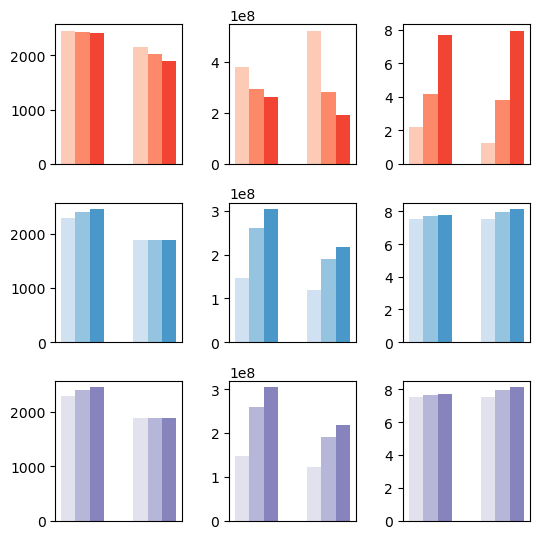

In [74]:
cmap1 = plt.get_cmap('Reds')
colors1 = cmap1([0.2, 0.4, 0.6])
cmap2 = plt.get_cmap('Blues')
colors2 = cmap2([0.2, 0.4, 0.6])
cmap3 = plt.get_cmap('Purples')
colors3 = cmap3([0.2, 0.4, 0.6])


x = np.arange(2)  # the label locations
width = 0.20  # the width of the bars

#to create clusters of leaky and non-leaky data had to divided based on second parameter. 
bar1 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.6].max_gfp
bar2 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.4].max_gfp
bar3 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.1].max_gfp
bar4 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.6].switching_density
bar5 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.4].switching_density
bar6 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.1].switching_density
bar7 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.6].transition_time
bar8 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.4].transition_time
bar9 = metrics_repr_strnth[metrics_repr_strnth['activity_ratio'] == 0.1].transition_time
bar10 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1*0.25].max_gfp
bar11 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1].max_gfp
bar12 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1*1.75].max_gfp
bar13 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1*0.25].switching_density
bar14 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1].switching_density
bar15 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1*1.75].switching_density
bar16 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1*0.25].transition_time
bar17 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1].transition_time
bar18 = metrics_leaky_kd1[metrics_leaky_kd1['Kd1'] == kd1*1.75].transition_time
bar19 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2*0.25].max_gfp
bar20 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2].max_gfp
bar21 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2*1.75].max_gfp
bar22 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2*0.25].switching_density
bar23 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2].switching_density
bar24 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2*1.75].switching_density
bar25 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2*0.25].transition_time
bar26 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2].transition_time
bar27 = metrics_leaky_kd2[metrics_leaky_kd2['Kd2'] == kd2*1.75].transition_time


fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (5.5,5.5))
ax1.bar(x - width, bar1, width, color = colors1[0] )
ax1.bar(x,         bar2, width, color = colors1[1] )
ax1.bar(x + width, bar3, width, color = colors1[2] )
ax2.bar(x - width, bar4, width, color = colors1[0] )
ax2.bar(x,         bar5, width, color = colors1[1] )
ax2.bar(x + width, bar6, width, color = colors1[2] )
ax3.bar(x - width, bar7, width, color = colors1[0] )
ax3.bar(x,         bar8, width, color = colors1[1] )
ax3.bar(x + width, bar9, width, color = colors1[2] )
ax4.bar(x - width, bar10, width, color = colors2[0] )
ax4.bar(x,         bar11, width, color = colors2[1] )
ax4.bar(x + width, bar12, width, color = colors2[2] )
ax5.bar(x - width, bar13, width, color = colors2[0] )
ax5.bar(x,         bar14, width, color = colors2[1] )
ax5.bar(x + width, bar15, width, color = colors2[2] )
ax6.bar(x - width, bar16, width, color = colors2[0] )
ax6.bar(x,         bar17, width, color = colors2[1] )
ax6.bar(x + width, bar18, width, color = colors2[2] )
ax7.bar(x - width, bar19, width, color = colors3[0] )
ax7.bar(x,         bar20, width, color = colors3[1] )
ax7.bar(x + width, bar21, width, color = colors3[2] )
ax8.bar(x - width, bar22, width, color = colors3[0] )
ax8.bar(x,         bar23, width, color = colors3[1] )
ax8.bar(x + width, bar24, width, color = colors3[2] )
ax9.bar(x - width, bar25, width, color = colors3[0] )
ax9.bar(x,         bar26, width, color = colors3[1] )
ax9.bar(x + width, bar27, width, color = colors3[2] )



#ax1.set_ylabel('Max GFP')
#ax2.set_ylabel('Switching Density\n(CFU/mL)')
#ax3.set_ylabel('Transition Time (hr)')
#ax4.set_ylabel('Max GFP')
#ax5.set_ylabel('Switching Density\n(CFU/mL)')
#ax6.set_ylabel('Transition Time (hr)')
#ax7.set_ylabel('Max GFP')
#ax8.set_ylabel('Switching Density\n(CFU/mL)')
#ax9.set_ylabel('Transition Time (hr)')


#for some reason first label goes missing. 
ax1.set_xticklabels(labels = '')
ax2.set_xticklabels(labels = '')
ax3.set_xticklabels(labels = '')
ax4.set_xticklabels(labels = '')
ax5.set_xticklabels(labels = '')
ax6.set_xticklabels(labels = '')
ax7.set_xticklabels(labels = '')
ax8.set_xticklabels(labels = '')
ax9.set_xticklabels(labels = '')


ax1.tick_params(bottom = False)
ax2.tick_params(bottom = False)
ax3.tick_params(bottom = False)
ax4.tick_params(bottom = False)
ax5.tick_params(bottom = False)
ax6.tick_params(bottom = False)
ax7.tick_params(bottom = False)
ax8.tick_params(bottom = False)
ax9.tick_params(bottom = False)


fig.tight_layout()
#plt.savefig('Figures\leaky_nonleaky_twosensi_param_compile.png', dpi = 350, bbox_inches = "tight")

## heat map for % change in parameter

In [75]:
leaky_dcas9_rows =  (metrics_dcas9_df.alphaT == alpha0) | (metrics_dcas9_df.alphaT == 0) 
leaky_kd1_rows =  (metrics_complex_df.alphaT == alpha0) | (metrics_complex_df.alphaT == 0) 
leaky_kd2_rows =  (metrics_dna_df.alphaT == alpha0) | (metrics_dna_df.alphaT == 0) 

repr_paramData1 = metrics_dcas9_df[leaky_dcas9_rows]
kd1_paramData1 = metrics_complex_df[leaky_kd1_rows]
kd2_paramData1 = metrics_dna_df[leaky_kd2_rows]

leakydf = repr_paramData1[repr_paramData1['alphaT'] == alpha0]
nonleakydf = repr_paramData1[repr_paramData1['alphaT'] == 0]



In [76]:
def calculate_percent_change(metrics_df:pd.DataFrame, param_name:str, param_value:float, base_param_value: float, metric_name:str):

    #calculate percent change
    new_param_metrics = metrics_df[metrics_df[param_name] == param_value]
    base_param_metrics = metrics_df[metrics_df[param_name] == base_param_value]

    percent_change_metric = 100*(new_param_metrics[metric_name].values[0] - base_param_metrics[metric_name].values[0])/base_param_metrics[metric_name].values[0]
    return percent_change_metric


In [77]:
def calculate_percent_change_metrics(metrics_df:pd.DataFrame, parameter_name:str, parameter_value:float, base_parameter_value:float):
    change_in_max_gfp = calculate_percent_change(metrics_df, param_name = parameter_name, param_value = parameter_value, base_param_value= base_parameter_value, metric_name= 'max_gfp')
    change_in_switching_density = calculate_percent_change(metrics_df, param_name = parameter_name, param_value = parameter_value, base_param_value= base_parameter_value, metric_name= 'switching_density')
    change_in_fold_repression = calculate_percent_change(metrics_df, param_name = parameter_name, param_value = parameter_value, base_param_value= base_parameter_value, metric_name= 'fold_repression')
    change_in_transition_time = calculate_percent_change(metrics_df, param_name = parameter_name, param_value = parameter_value, base_param_value= base_parameter_value, metric_name= 'transition_time')
    return [change_in_max_gfp, change_in_switching_density, change_in_fold_repression, change_in_transition_time]


In [78]:
#calculaitng percent change in metrics when activity_ratio or repression strength of dCas9 is varied. activity ration of 0.6 or repression strength of 40% is used a base value

activity_ratio_percent_change = pd.DataFrame(columns = ['max_gfp_leaky', 'max_gfp_nonleaky', 'fold_repression_leaky','fold_repression_nonleaky', 
                                                        'transition_time_leaky', 'transition_time_nonleaky', 'switching_density_leaky', 'switching_density_nonleaky'])
for i in [0.1, 0.2, 0.3, 0.4, 0.5]:
    percent_change_leaky_metrics   = calculate_percent_change_metrics(leakydf, parameter_name = 'activity_ratio', parameter_value= i, base_parameter_value=0.6)
    percent_change_nonleaky_metrics   = calculate_percent_change_metrics(nonleakydf, parameter_name = 'activity_ratio', parameter_value= i, base_parameter_value=0.6)
    newrow = {'max_gfp_leaky': percent_change_leaky_metrics[0], 
              'max_gfp_nonleaky': percent_change_nonleaky_metrics[0],
              'switching_density_leaky':percent_change_leaky_metrics[1], 
              'switching_density_nonleaky':percent_change_nonleaky_metrics[1], 
              'fold_repression_leaky':percent_change_leaky_metrics[2], 
              'fold_repression_nonleaky':percent_change_nonleaky_metrics[2], 
              'transition_time_leaky':percent_change_leaky_metrics[3],
              'transition_time_nonleaky':percent_change_nonleaky_metrics[3] }
                
    activity_ratio_percent_change = pd.concat([activity_ratio_percent_change, pd.DataFrame([newrow])], ignore_index = True)
activity_ratio_percent_change

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\1981752971.py:17: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



max_gfp_leaky  max_gfp_nonleaky  fold_repression_leaky  \
0     -11.964922         -1.751919             347.024352   
1     -10.299463         -1.468831             150.876486   
2      -8.345241         -1.159037              76.884557   
3      -6.028333         -0.817772              38.443171   
4      -3.267473         -0.436620              15.241849   

   fold_repression_nonleaky  transition_time_leaky  transition_time_nonleaky  \
0                398.782677             527.848101                250.364964   
1                175.549550             397.468354                182.481752   
2                 90.744386             297.468354                132.116788   
3                 46.116156             202.531646                 89.051095   
4                 18.613242             107.594937                 46.715328   

   switching_density_leaky  switching_density_nonleaky  
0               -63.451929                  -31.379104  
1               -57.472274                  -29.362096  
2               -51.990262                  -26.580274  
3               -46.091793                  -22.200895  
4               -34.608053                  -15.137476

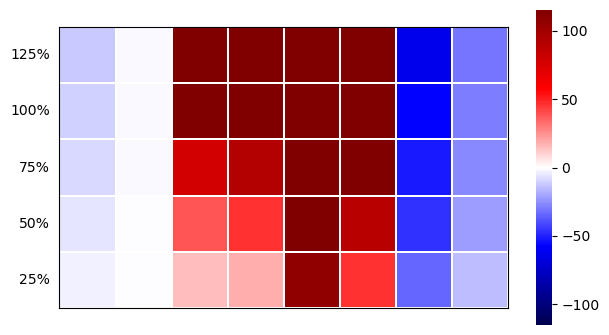

In [79]:
ax = sns.heatmap(activity_ratio_percent_change, linewidth=.05, cmap='seismic', square = True, 
                 cbar_kws={ 'shrink':0.7}, vmin =-115, vmax = 115 )
ax.set_ylim(5, 0)
ax.tick_params(bottom = False, left = False)
ax.set_xticklabels(labels = '')
ax.set_yticklabels(labels = ['125%', '100%', '75%', '50%', '25%'], rotation = 360)
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.tight_layout()
plt.savefig('activity_ratio_heatmap.png', dpi = 350, bbox_inches = 'tight')

In [80]:
#calculaitng percent change in metrics when Kd1 is varied. 

kd1_leakydf = kd1_paramData1[kd1_paramData1['alphaT'] == alpha0]
kd1_nonleakydf = kd1_paramData1[kd1_paramData1['alphaT'] == 0]

kd1_percent_change = pd.DataFrame(columns = ['max_gfp_leaky', 'max_gfp_nonleaky', 'fold_repression_leaky','fold_repression_nonleaky', 
                                                        'transition_time_leaky', 'transition_time_nonleaky', 'switching_density_leaky', 'switching_density_nonleaky'])
for i in Kd1_range:
    percent_change_leaky_metrics   = calculate_percent_change_metrics(kd1_leakydf, parameter_name = 'Kd1', parameter_value= i, base_parameter_value=get_default_param_value('Kd1'))
    percent_change_nonleaky_metrics   = calculate_percent_change_metrics(kd1_nonleakydf, parameter_name = 'Kd1', parameter_value= i, base_parameter_value= get_default_param_value('Kd1'))
    newrow = {'max_gfp_leaky': percent_change_leaky_metrics[0], 
              'max_gfp_nonleaky': percent_change_nonleaky_metrics[0],
              'switching_density_leaky':percent_change_leaky_metrics[1], 
              'switching_density_nonleaky':percent_change_nonleaky_metrics[1], 
              'fold_repression_leaky':percent_change_leaky_metrics[2], 
              'fold_repression_nonleaky':percent_change_nonleaky_metrics[2], 
              'transition_time_leaky':percent_change_leaky_metrics[3],
              'transition_time_nonleaky':percent_change_nonleaky_metrics[3] }
                
    kd1_percent_change = pd.concat([kd1_percent_change, pd.DataFrame([newrow])], ignore_index = True)
kd1_percent_change

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\357851768.py:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



max_gfp_leaky  max_gfp_nonleaky  fold_repression_leaky  \
0      -0.314627         -5.261316              -0.314600   
1      -0.109380         -2.500808              -0.109364   
2       0.000000          0.000000               0.000000   
3       0.037573          1.337864               0.037561   
4       0.048219          1.822325               0.048202   

   fold_repression_nonleaky  transition_time_leaky  transition_time_nonleaky  \
0                 -5.261290              -5.443548                 -2.291667   
1                 -2.500792              -2.822581                 -1.041667   
2                  0.000000               0.000000                  0.000000   
3                  1.337852               1.814516                  0.833333   
4                  1.822307               2.419355                  1.041667   

   switching_density_leaky  switching_density_nonleaky  
0               -37.590037                  -44.054697  
1               -19.658276                  -22.963641  
2                 0.000000                    0.000000  
3                10.629775                   12.285745  
4                14.418391                   16.707527

In [81]:
#calculaitng percent change in metrics when Kd2 is varied. 

kd2_leakydf = kd2_paramData1[kd2_paramData1['alphaT'] == alpha0]
kd2_nonleakydf = kd2_paramData1[kd2_paramData1['alphaT'] == 0]

kd2_percent_change = pd.DataFrame(columns = ['max_gfp_leaky', 'max_gfp_nonleaky', 'fold_repression_leaky','fold_repression_nonleaky', 
                                                        'transition_time_leaky', 'transition_time_nonleaky', 'switching_density_leaky', 'switching_density_nonleaky'])
for i in Kd2_range:
    percent_change_leaky_metrics   = calculate_percent_change_metrics(kd2_leakydf, parameter_name = 'Kd2', parameter_value= i, base_parameter_value=get_default_param_value('Kd2'))
    percent_change_nonleaky_metrics   = calculate_percent_change_metrics(kd2_nonleakydf, parameter_name = 'Kd2', parameter_value= i, base_parameter_value= get_default_param_value('Kd2'))
    newrow = {'max_gfp_leaky': percent_change_leaky_metrics[0], 
              'max_gfp_nonleaky': percent_change_nonleaky_metrics[0],
              'switching_density_leaky':percent_change_leaky_metrics[1], 
              'switching_density_nonleaky':percent_change_nonleaky_metrics[1], 
              'fold_repression_leaky':percent_change_leaky_metrics[2], 
              'fold_repression_nonleaky':percent_change_nonleaky_metrics[2], 
              'transition_time_leaky':percent_change_leaky_metrics[3],
              'transition_time_nonleaky':percent_change_nonleaky_metrics[3] }
                
    kd2_percent_change = pd.concat([kd2_percent_change, pd.DataFrame([newrow])], ignore_index = True)
kd2_percent_change

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\3665668116.py:20: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



max_gfp_leaky  max_gfp_nonleaky  fold_repression_leaky  \
0      -0.287882         -5.002789               0.903030   
1      -0.104614         -2.430246               0.686260   
2       0.000000          0.000000               0.000000   
3       0.037016          1.322569              -0.737348   
4       0.047607          1.804217              -1.107633   

   fold_repression_nonleaky  transition_time_leaky  transition_time_nonleaky  \
0                 -3.850865              -5.040323                 -1.875000   
1                 -1.645104              -2.620968                 -0.833333   
2                  0.000000               0.000000                  0.000000   
3                  0.521862               1.612903                  0.625000   
4                  0.602838               2.217742                  0.833333   

   switching_density_leaky  switching_density_nonleaky  
0               -35.452549                  -43.104747  
1               -19.658276                  -22.963641  
2                 0.000000                    0.000000  
3                10.629775                   12.285747  
4                14.418391                   16.707527

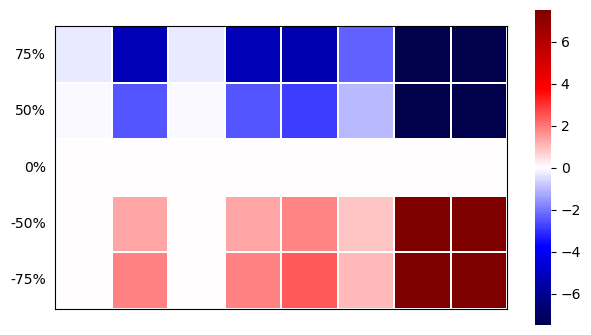

In [82]:
ax = sns.heatmap(kd1_percent_change, linewidth=.05, cmap='seismic', square = True, 
                 cbar_kws={ 'shrink':0.7}, vmin =-7.5, vmax = 7.5 )
ax.set_ylim(5, 0)
ax.tick_params(bottom = False, left = False)
ax.set_xticklabels(labels = '')
ax.set_yticklabels(labels = ['75%', '50%', '0%', '-50%', '-75%'], rotation = 360)
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.tight_layout()
plt.savefig('kd1_heatmap.png', dpi = 350, bbox_inches = 'tight')

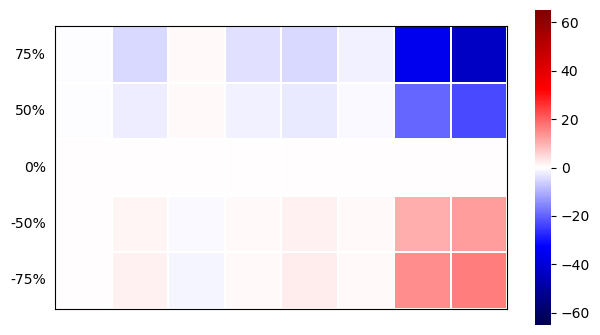

In [83]:
ax = sns.heatmap(kd2_percent_change, linewidth=.05, cmap='seismic', square = True, cbar_kws={ 'shrink':0.7},
                vmin = -65, vmax = 65)
ax.set_ylim(5, 0)
ax.tick_params(bottom = False, left = False)
ax.set_xticklabels(labels = '')
ax.set_yticklabels(labels = ['75%', '50%', '0%', '-50%', '-75%'], rotation = 360)
for _, spine in ax.spines.items():
    spine.set_visible(True)
plt.tight_layout()
plt.savefig('kd2_heatmap.png', dpi =350, bbox_inches = 'tight')

## compiled leaky vs non-leaky switch parameters

In [84]:
repr_paramData1

alphaT  activity_ratio  switching_density  fold_repression  \
0       0             0.1       2.600275e+08         7.077677   
1       0             0.2       2.676706e+08         3.910021   
2       0             0.3       2.782119e+08         2.706644   
3       0             0.4       2.948068e+08         2.073374   
4       0             0.5       3.215725e+08         1.683110   
5       0             0.6       3.789334e+08         1.418990   
12    0.3             0.1       1.904491e+08         5.555240   
13    0.3             0.2       2.216086e+08         3.117680   
14    0.3             0.3       2.501749e+08         2.198171   
15    0.3             0.4       2.809114e+08         1.720454   
16    0.3             0.5       3.407523e+08         1.432128   
17    0.3             0.6       5.210921e+08         1.242715   

    transition_time      max_gfp  
0          7.682561  2405.558291  
1          6.194065  2412.489554  
2          5.089697  2420.074729  
3          4.145382  2428.430434  
4          3.217072  2437.762760  
5          2.192731  2448.453203  
12         7.938646  1887.692921  
13         6.290097  1923.404545  
14         5.025675  1965.307959  
15         3.825275  2014.988272  
16         2.624875  2074.188043  
17         1.264421  2144.250862

In [87]:
leaky_repr = repr_paramData1[(repr_paramData1['alphaT'] == 0.3) & (repr_paramData1['activity_ratio'] == 0.1)]
nonleaky_repr = repr_paramData1[(repr_paramData1['alphaT'] == 0) & (repr_paramData1['activity_ratio'] == 0.1)]
print(leaky_repr)
print(nonleaky_repr)
gfp = 100*(nonleaky_repr.max_gfp.values[0]-leaky_repr.max_gfp.values[0])/nonleaky_repr.max_gfp.values[0]
density = 100*(nonleaky_repr.switching_density.values[0]-leaky_repr.switching_density.values[0])/nonleaky_repr.switching_density.values[0]
fold = 100*(nonleaky_repr.fold_repression.values[0]-leaky_repr.fold_repression.values[0])/nonleaky_repr.fold_repression.values[0]
time = 100*(nonleaky_repr.transition_time.values[0]-leaky_repr.transition_time.values[0])/nonleaky_repr.transition_time.values[0]

   alphaT  activity_ratio  switching_density  fold_repression  \
12    0.3             0.1       1.904491e+08          5.55524   

    transition_time      max_gfp  
12         7.938646  1887.692921  
  alphaT  activity_ratio  switching_density  fold_repression  transition_time  \
0      0             0.1       2.600275e+08         7.077677         7.682561   

       max_gfp  
0  2405.558291  


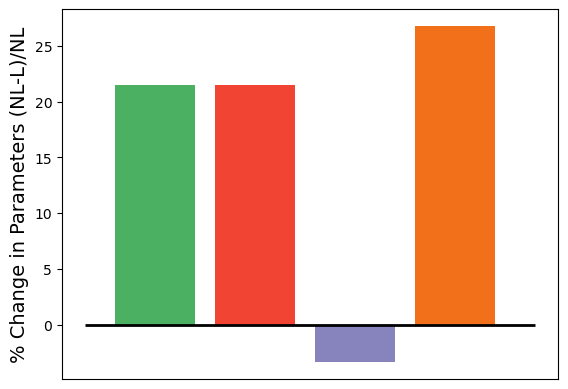

In [88]:
cmap1 = plt.get_cmap('Oranges')
orange = cmap1(0.6)
cmap2 = plt.get_cmap('Purples')
purple = cmap2(0.6)
cmap3 = plt.get_cmap('Greens')
green = cmap3(0.6)
cmap4 = plt.get_cmap('Reds')
red = cmap4(0.6)
X = np.arange(4)
width = 0.8
fig, ax = plt.subplots()
#ax.set_xlabel('Time (hr)', fontsize = 16)
ax.set_ylabel('% Change in Parameters (NL-L)/NL',  fontsize = 14)
ax.bar(X-width, [gfp, fold, time, density], width, color = [green,  red, purple, orange,])
ax.tick_params(bottom = False)
ax.set_xticklabels(labels = '')
plt.hlines(y= 0, xmin= -1.5, xmax= 3, color='black', linewidth = 2)
plt.show()
fig.savefig('params_leaky_vs_nonleaky.png', dpi = 350, bbox_inches = 'tight')

# Stringency of LuxR

## Variation in dynamics with change in stringency

In [89]:
less_stringent_sys = solve_qcrispri_simple()
high_stringent_sys = solve_qcrispri_simple(alphaRL = 0, KD =175)

wild_switch_density, wild_fold_repression, wild_transition_time = CalculateDynamicsMetrics(less_stringent_sys.GFP, t, less_stringent_sys.N).get_dynamic_metrics()
mutant_switch_density, mutant_fold_repression, mutant_transition_time = CalculateDynamicsMetrics(high_stringent_sys.GFP, t, high_stringent_sys.N).get_dynamic_metrics()

2981.63323479158 372.0769043200215
3155.573944742687 372.07690623505806


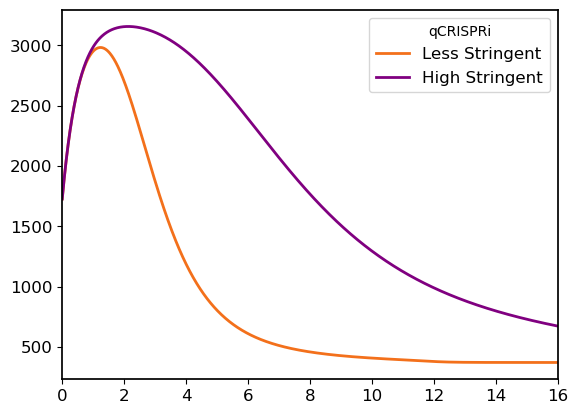

In [90]:


cmap1 = plt.get_cmap('Oranges')
color1 = cmap1(0.6)
fig, ax = plt.subplots()
plt.plot(t, less_stringent_sys.GFP, linewidth = 2, label='Less Stringent', color = color1) 
plt.plot(t, high_stringent_sys.GFP, linewidth = 2, label='High Stringent', color = 'purple') 



ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
ax.legend(loc = 'upper right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.rc('legend', fontsize=12)
plt.legend(title = 'qCRISPRi')
#plt.savefig('Figures\LuxR_str_dynamics.png',dpi = 600, bbox_inches = 'tight')

## bar plots for parameter variation.

In [91]:
str_df = pd.DataFrame(columns = ['wildtype', 'mutant'], index = ['max_gfp', 'switching_density', 'fold_repression', 'transition_time'])
row1 = {'wildtype': max(less_stringent_sys.GFP), 'mutant':max(high_stringent_sys.GFP)}
row2 = {'wildtype': wild_switch_density, 'mutant':mutant_switch_density}
row3 = {'wildtype': wild_fold_repression, 'mutant':mutant_fold_repression}
row4 = {'wildtype': wild_transition_time, 'mutant':mutant_transition_time}
str_df.loc['max_gfp'] = row1
str_df.loc['switching_density'] = row2
str_df.loc['fold_repression'] = row3
str_df.loc['transition_time'] = row4
str_df['percent_change'] = 100*(str_df.mutant - str_df.wildtype)/str_df.wildtype
str_df

wildtype            mutant percent_change
max_gfp                2981.633235       3155.573945       5.833739
switching_density  88067676.412331  1256394433.08435    1326.623801
fold_repression           8.013486          8.480972       5.833739
transition_time           7.778593         18.582194     138.888889

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\440490260.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\440490260.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\440490260.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\440490260.py:17: FutureWarning:

Series.__getit

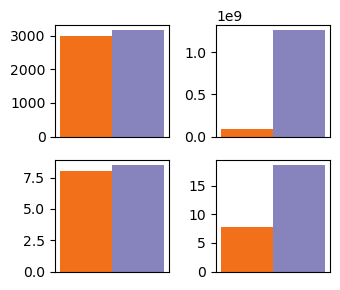

In [92]:
cmap1 = plt.get_cmap('Oranges')
color1 = cmap1(0.6)
cmap2 = plt.get_cmap('Purples')
color2 = cmap2(0.6)

x = np.arange(1)  # the label locations
width = 0.10  # the width of the bars
bar1 = str_df.wildtype
bar2 = str_df.mutant

fig, ((ax1,ax11),(ax2, ax21)) = plt.subplots(2,2, figsize=(3.5,3))
ax1.bar(x        , [bar1[0]], width, color = color1)
ax1.bar(x + width, [bar2[0]], width, color = color2)

#ax11 = ax1.twinx()
ax11.bar(1 - width, [bar1[1]], width, color = color1)
ax11.bar(1        , [bar2[1]], width, color = color2)
#ax1.set_ylabel('GFP (au)')
#ax11.set_ylabel('CFU/mL')

ax2.bar(x        , [bar1[2]], width, color = color1)
ax2.bar(x + width, [bar2[2]], width, color = color2)

#ax21 = ax2.twinx()
ax21.bar(1 - width, [bar1[3]], width, color = color1)
ax21.bar(1        , [bar2[3]], width, color = color2)
#ax2.set_ylabel('Fold Change')
#ax21.set_ylabel('Hours')

ax1.set_xticklabels(labels = '')
ax2.set_xticklabels(labels = '')
ax11.set_xticklabels(labels = '')
ax21.set_xticklabels(labels = '')
ax1.tick_params(bottom = False)
ax2.tick_params(bottom = False)
ax11.tick_params(bottom = False)
ax21.tick_params(bottom = False)
fig.tight_layout()
#fig.savefig('Figures\LuxR_str_param.png',dpi = 450,  bbox_inches = 'tight')

# Sponge design

In [93]:
decoy_range = [0, 2, 5, 10, 20, 40]
gfp_decoy, metrics_decoy = vary_decoysite("decoy_sites", decoy_range )

qcrispri_df = solve_qcrispri()

C:\Users\devgu\Quorum_Switch\src\sensitivity_analysis.py:99: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



1705.0395248786451 345.08774640233446
2090.185780012391 345.087747022272
2311.6514814672614 345.08774780474624
2465.689868160603 345.0877485656063
2584.488676427919 345.0877497580036
2664.6916961956113 345.0877518509122


## compiled dynamics plot

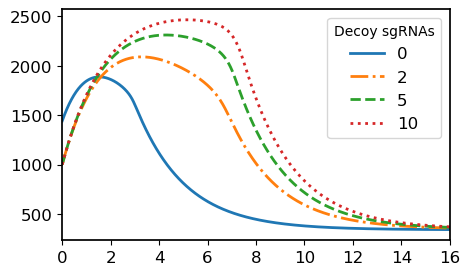

In [94]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
fig, ax = plt.subplots(figsize=(5, 3))
plt.plot(t, qcrispri_df.GFP, linewidth = 2, label='0', color = colors[0]) 
plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 2].GFP, linewidth = 2, linestyle = "-.", label='2', color = colors[1])
plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 5].GFP, linewidth = 2, linestyle = '--', label='5', color = colors[2])  
plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 10].GFP, linewidth = 2, linestyle = ':', label='10', color = colors[3])
#plt.plot(t, gfp_decoy[gfp_decoy["decoy_sites"] == 20].GFP, linewidth = 2, linestyle = '-.', label='20', color = colors[4])
ax.set_xlim(0,16)
for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set(linewidth = 1.25)
#ax.set_xlabel('Time (hr)', fontsize = 16)
#ax.set_ylabel('GFP Fluorescence [au]',  fontsize = 16)
leg = ax.legend(prop={"size":12})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Decoy sgRNAs', loc='upper right')
plt.rc('legend', fontsize=12)
#plt.savefig('Figures\sponge_dynamics.png', dpi = 386, bbox_inches = 'tight')

## compiled parameter vary plot

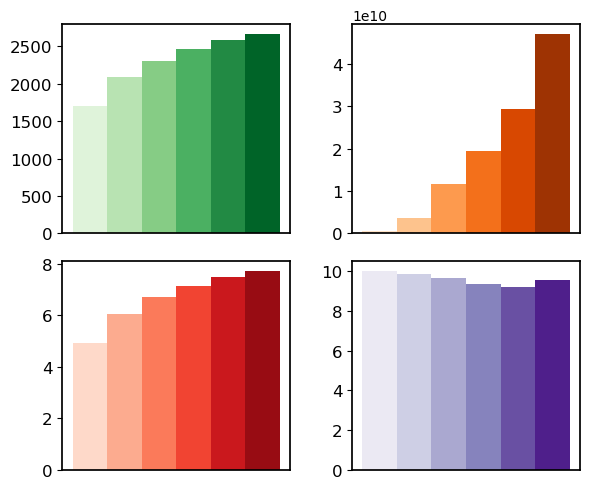

In [95]:
cmap1 = plt.get_cmap('Oranges')
colors1 = cmap1([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])
cmap2 = plt.get_cmap('Purples')
colors2 = cmap2([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])
cmap3 = plt.get_cmap('Greens')
colors3 = cmap3([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])
cmap4 = plt.get_cmap('Reds')
colors4 = cmap4([0.15, 0.30, 0.45, 0.60, 0.75, 0.90])

width = 0.20
x = [(0-2*width), (0-width), 0, 0+width, 0+2*width, 0+3*width]
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize = (6,5))
for i in range(len(x)):
    ax1.bar(x[i], metrics_decoy.max_gfp[i], width, color = colors3[i])
    ax2.bar(x[i], metrics_decoy.switching_density[i], width, color = colors1[i])
    ax3.bar(x[i], metrics_decoy.fold_repression[i], width, color = colors4[i])
    ax4.bar(x[i], metrics_decoy.transition_time[i], width, color = colors2[i])
for i in ['right', 'left', 'top', 'bottom']:
    ax1.spines[i].set(linewidth = 1.25)
    ax2.spines[i].set(linewidth = 1.25)
    ax3.spines[i].set(linewidth = 1.25)
    ax4.spines[i].set(linewidth = 1.25)

ax1.tick_params(labelsize = 12)
ax2.tick_params(labelsize = 12)
ax3.tick_params(labelsize = 12)
ax4.tick_params(labelsize = 12)
    
#ax1.set_ylabel('GFP (au)')
#ax2.set_ylabel('Cell Density (CFU/mL)')
#ax3.set_ylabel('Fold Change')
#ax4.set_ylabel('Time (hr)')

#ax1.set_xlabel('Max GFP')
#ax2.set_xlabel('Switching Density')
#ax3.set_xlabel('Fold Repression')
#ax4.set_xlabel('Transition Time')

ax1.tick_params(bottom = False)
ax1.set_xticklabels(labels = '')
ax2.tick_params(bottom = False)
ax2.set_xticklabels(labels = '')
ax3.tick_params(bottom = False)
ax3.set_xticklabels(labels = '')
ax4.tick_params(bottom = False)
ax4.set_xticklabels(labels = '')
fig.tight_layout()
#fig.savefig('Figures\sponge_param_compile.png', dpi = 300, bbox_inches = 'tight')

## compiled Gamma parameter plot

In [96]:
metrics_decoy['gamma'] = metrics_decoy.transition_time/ metrics_decoy.fold_repression

C:\Users\devgu\AppData\Local\Temp\ipykernel_61528\3682519613.py:2: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "C1o-" (-> color=(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)). The keyword argument will take precedence.



(array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2]),
 [Text(0, 1.0, '1.0'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.4, '1.4'),
  Text(0, 1.6, '1.6'),
  Text(0, 1.8, '1.8'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.2, '2.2')])

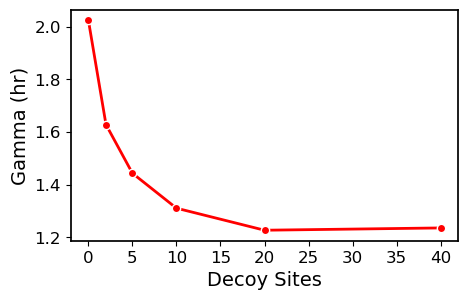

In [97]:

fig, ax = plt.subplots(figsize = (5,3))
ax.plot(metrics_decoy.decoy_sites, metrics_decoy.gamma, "C1o-", mec = '1.0', color = 'red', linewidth = 2)
for i in ['right', 'left', 'top', 'bottom']:
        ax.spines[i].set(linewidth = 1.25)
plt.xlabel('Decoy Sites', fontsize = 14)
plt.ylabel('Gamma (hr)',  fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#fig.savefig('Figures\sponge_gamma.png', dpi = 400, bbox_inches = 'tight')

## Switching density vs Decoy sites

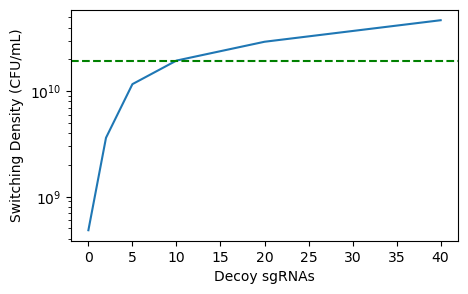

In [98]:
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(metrics_decoy.decoy_sites, metrics_decoy.switching_density)
plt.axhline(y=metrics_decoy.iloc[3].switching_density, color='g', linestyle='--')
ax.set_yscale('log')
plt.xlabel('Decoy sgRNAs')
plt.ylabel('Switching Density (CFU/mL)')
plt.show()
#fig.savefig('Figures\decoy_switching_density.png', dpi = 400, bbox_inches = 'tight')